In [1]:
import pandas as pd # type: ignore
import glob

def load_salesstore_data(data_folder):
    # Get the path to all files containing 'salesstore' and ending with '.xlsx'
    salesstore_files = glob.glob(data_folder + "/salebystore*.xlsx")
    
    # If no files are found, raise a FileNotFoundError
    if not salesstore_files:
        raise FileNotFoundError(f"No 'salebycategory*.xlsx' files found in {data_folder}")

    # Load all the salesstore data into a list of pandas dataframes
    salesstore_dfs = [pd.read_excel(file) for file in salesstore_files]
    
    # Concatenate all the dataframes into one
    salesstore_df = pd.concat(salesstore_dfs, ignore_index=True)
    
    return salesstore_df

# Define the data folder
data_folder1 = r'C:\Users\PC\Dropbox\Projects\data_xls\salebystore'
data_folder2 = r'C:\Users\trieu.pham\Dropbox\Projects\data_xls\salebystore'
data_folder3 = r'/Users/trieupham/Dropbox/Projects/data_xls/salebystore'
data_folder4 = r'C:\Users\haitr\Dropbox\Projects\data_xls\salebystore'

import os

data_folders = [data_folder1, data_folder2, data_folder3, data_folder4]
df = None

for folder in data_folders:
    if os.path.exists(folder):
        df = load_salesstore_data(folder)
        break

if df is None:
    print("Data folder not found")

In [2]:
#make sure there are not any duplicated rows
print(df.duplicated().sum())

#drop duplicated rows
df = df.drop_duplicates()

0


In [3]:
import pandas as pd

# Convert the 'dateKey' column to datetime format
df['dateKey'] = pd.to_datetime(df['dateKey'], format='%Y%m%d')

# Extract the weekday from the date
df['weekday'] = df['dateKey'].dt.day_name()

# Group by the weekday and calculate the mean of 'netSales'
average_sales = df.groupby('weekday')['netSales'].mean()

# Sort the weekdays descendingly by the average net sales
average_sales = average_sales.sort_values(ascending=False)

# Change sale format to currency, with two decimal places
average_sales = average_sales.map('{:,.2f}'.format)

print(average_sales)

weekday
Saturday     16,058,316.05
Sunday       15,086,305.81
Friday       13,681,473.00
Wednesday    13,150,621.05
Tuesday      13,118,044.14
Monday       12,904,528.47
Thursday     12,755,288.95
Name: netSales, dtype: object


In [4]:
import pandas as pd

# Convert the 'dateKey' column to datetime format
df['dateKey'] = pd.to_datetime(df['dateKey'], format='%Y%m%d')

# Extract the month and weekday from the date
df['month'] = df['dateKey'].dt.month_name()
df['weekday'] = df['dateKey'].dt.day_name()

# Group by the month and weekday and calculate the mean of 'netSales'
average_sales = df.groupby(['month', 'weekday'])['netSales'].mean().reset_index()

# Sort the results by month and then by average net sales within each month
average_sales = average_sales.sort_values(by=['month', 'netSales'], ascending=[True, False])

# Change sale format to currency, with two decimal places
average_sales['netSales'] = average_sales['netSales'].map('{:,.2f}'.format)

#print(average_sales)

# Print average sales for September only
print(average_sales[average_sales['month'] == 'September'])

# Print average sales for April only
print(average_sales[average_sales['month'] == 'April'])

        month    weekday       netSales
66  September     Sunday  17,399,995.20
65  September   Saturday  17,331,688.50
64  September     Monday  14,210,640.80
63  September     Friday  14,117,729.25
68  September    Tuesday  14,069,189.00
67  September   Thursday  13,843,551.25
69  September  Wednesday  13,003,745.50
   month    weekday       netSales
2  April   Saturday  15,416,354.00
3  April     Sunday  15,263,523.75
4  April   Thursday  13,611,837.00
0  April     Friday  13,147,167.50
6  April  Wednesday  12,857,554.75
5  April    Tuesday  12,819,201.60
1  April     Monday  12,441,210.80


In [5]:
# Extract the year and month from the 'dateKey' column
df['year_month'] = df['dateKey'].dt.to_period('M')

# Group by the 'year_month' column, and calculate the sum of 'netSales'
monthly_sales = df.groupby('year_month')['netSales'].sum()

# Count the number of unique days in each month
days_in_month = df.groupby('year_month')['dateKey'].nunique()

# Calculate the average daily sales per month
average_daily_sales = monthly_sales / days_in_month

# Sort the average daily sales in descending order
average_daily_sales = average_daily_sales.sort_values(ascending=False)

# Change the sales format to currency, with two decimal places
average_daily_sales = average_daily_sales.map('{:,.2f}'.format)

# Sort average daily sales in descending order, order by month
average_daily_sales = average_daily_sales.sort_index(ascending=False)
#print(average_daily_sales)
average_daily_sales

year_month
2024-10    15,144,885.77
2024-09    14,917,226.47
2024-08    15,642,057.45
2024-07    14,539,593.06
2024-06    15,474,169.03
2024-05    13,664,188.94
2024-04    13,582,927.00
2024-03    12,429,899.94
2024-02    10,810,962.24
2024-01    11,756,127.50
Freq: M, dtype: object

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Convert 'year_month' to a numerical format
df['year_month_num'] = df['year_month'].dt.to_timestamp().dt.year * 12 + df['year_month'].dt.to_timestamp().dt.month

# Group by the 'year_month_num' column, and calculate the sum of 'netSales' and count of 'dateKey'
grouped_df = df.groupby('year_month_num').agg({'netSales': 'sum', 'dateKey': 'nunique'})

# Calculate the average daily sales per month
average_daily_sales = grouped_df['netSales'] / grouped_df['dateKey']

# Fit a linear regression model
model = LinearRegression()
model.fit(grouped_df.index.values.reshape(-1, 1), average_daily_sales)

# Predict the month and year when the average daily sales will reach the target
target = 16000000
predicted_month_num = int((target - model.intercept_) / model.coef_[0])
predicted_year, predicted_month = divmod(predicted_month_num, 12)

# Print the prediction, target format to currency, with two decimal places
target = '{:,.2f}'.format(target)
print(f'The average daily sales will reach {target} in {predicted_month}/{predicted_year}')

The average daily sales will reach 16,000,000.00 in 10/2024


In [7]:
# Find the day with the highest sales
max_sales_day = df.loc[df['netSales'].idxmax(), 'dateKey']

# Find the day with the lowest sales
min_sales_day = df.loc[df['netSales'].idxmin(), 'dateKey']


# Print the results, show the sales format as currency
max_sales = '{:,.2f}'.format(df['netSales'].max())
min_sales = '{:,.2f}'.format(df['netSales'].min())
print(f'The day with the highest sales was {max_sales_day} with {max_sales}')
print(f'The day with the lowest sales was {min_sales_day} with {min_sales}')

The day with the highest sales was 2024-10-05 00:00:00 with 20,411,507.00
The day with the lowest sales was 2024-02-21 00:00:00 with 7,253,694.00


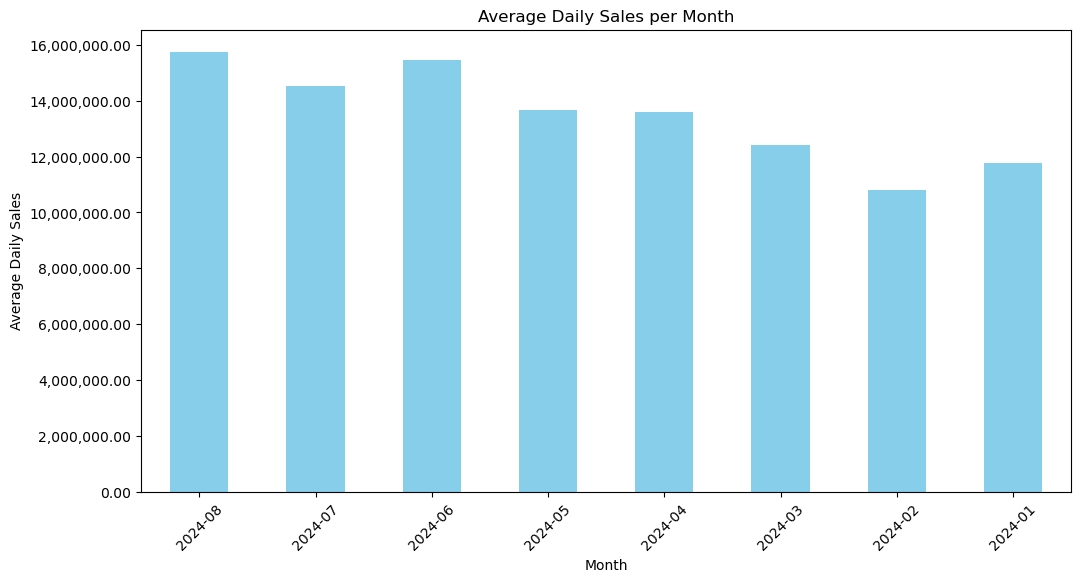

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'year_month': ['2024-08', '2024-07', '2024-06', '2024-05', '2024-04', '2024-03', '2024-02', '2024-01'],
    'average_daily_sales': ['15,753,188.57', '14,539,593.06', '15,474,169.03', '13,664,188.94', '13,582,927.00', '12,429,899.94', '10,810,962.24', '11,756,127.50']
}

# Create DataFrame
df_drawchart = pd.DataFrame(data)
df_drawchart['average_daily_sales'] = df_drawchart['average_daily_sales'].str.replace(',', '').astype(float)
df_drawchart.set_index('year_month', inplace=True)

# Plotting
ax = df_drawchart['average_daily_sales'].plot(kind='bar', figsize=(12, 6), color='skyblue')
ax.set_title('Average Daily Sales per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Sales')
ax.set_xticklabels(df_drawchart.index, rotation=45)

# Format the y-axis labels as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()